In [1]:
import numpy as np
import os
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

plt.style.use('ggplot')
# Requirements in NLTK
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gbert\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\gbert\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\gbert\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\gbert\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\gbert\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
os.getcwd()

'D:\\LEARNING DEVOPS\\ML Practice\\Kaggle datasets\\Sentiment Analysis Amazon Food Reviews'

In [3]:
# Read in data by unzipping the file first
if "Reviews.csv" not in os.listdir():
    reviews_zipfile = zipfile.ZipFile("Amazon Food Reviews.zip")
    reviews_zipfile.extractall()
    reviews_zipfile.close()

In [4]:
df = pd.read_csv("Reviews.csv")
df = df.head(5000)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


We can see different categories but the most useful here is the Score column

In [5]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      5000 non-null   int64 
 1   ProductId               5000 non-null   object
 2   UserId                  5000 non-null   object
 3   ProfileName             5000 non-null   object
 4   HelpfulnessNumerator    5000 non-null   int64 
 5   HelpfulnessDenominator  5000 non-null   int64 
 6   Score                   5000 non-null   int64 
 7   Time                    5000 non-null   int64 
 8   Summary                 5000 non-null   object
 9   Text                    5000 non-null   object
dtypes: int64(5), object(5)
memory usage: 390.8+ KB
None
(5000, 10)


# Analysis of the Dataset

First, we check the counts of each score in the 'Score' category

In [6]:
df['Score'].value_counts().sort_index()

1     469
2     290
3     395
4     712
5    3134
Name: Score, dtype: int64

We can see that there were 52,268 one-star reviews, 29,769 two-star reviews, and so on. To visualize the difference between each number of given scores, we can set up a bar plot.

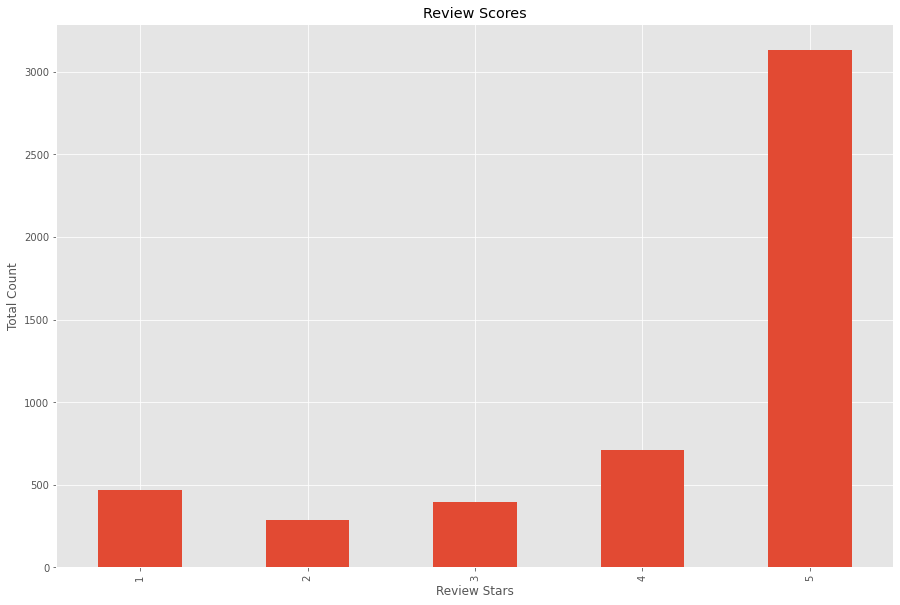

In [7]:
ax = df['Score'].value_counts().sort_index().plot(kind='bar', title='Review Scores', figsize=(15,10))
plt.xlabel('Review Stars')
plt.ylabel('Total Count')
plt.show()

We can clearly see that there are large numbers of 5-star reviews which presents a big imbalance in the dataset

# Basic NLTK

In [8]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


We can split each word and punctuations into tokens using nltk.word_tokenize

In [9]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

We now do a parts-of-speech tagging to categorize each word, e.g., 'oatmeal' is tagged as 'NN' which means its a noun. More details on: https://www.guru99.com/pos-tagging-chunking-nltk.html

In [10]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

Creating a chunk from the tagged variables

In [11]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


# VADER Sentiment Scoring

Using VADER; uses "bag of words" approach

In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

------------------------------------------
## Example of this sentiment analyzer

In [13]:
sia.polarity_scores("I am so happy!")

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

We can see that the sentiment analyzer scored the "I am so happy!" sentence as 31.8% neutral and 68.2% positive. 

'compound' score is the aggregation of the three scores.

In [14]:
sia.polarity_scores("Today is a bad day!")

{'neg': 0.558, 'neu': 0.442, 'pos': 0.0, 'compound': -0.5848}

Here, the sentiment analyzer correctly scored the "Today is a bad day!" sentence giving it a much more negative score and 0 positive.

-----------------------------------

Now, using the sentiment analyzer to our example...

In [15]:
example

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [16]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

Our model gave it a negative to neutral score with neutral being the dominant one. The compound score is also negative making it more on the negative analysis of the model.

In [17]:
!pip install ipywidgets

In [18]:
# Running the polarity score on the entier dataset
results_dict = {} # dictionary for the results
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    results_dict[myid] = sia.polarity_scores(text)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [19]:
vaders = pd.DataFrame(results_dict).T # Transposing the dataframe since the axis are incorrect
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [20]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### Plotting the VADER results

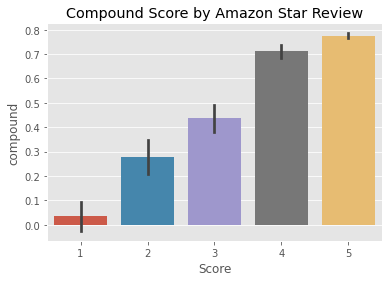

In [21]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

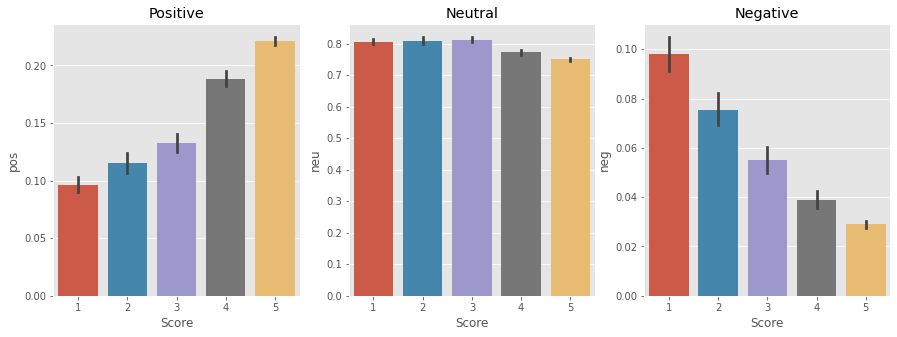

In [22]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()

We can see that VADER produces higher positive score for higher review score. This means that the model is working as intended.

# Using Roberta Pretrained Model

The Roberta Model is a more powerful model than VADER. It is a transformer-based model from huggingface.

In [23]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [24]:
# Base model from huggingface pretrained from twitter comments
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"

# Applying Transfer Learning from the base model
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [25]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2],
}
print(scores_dict)

{'roberta_neg': 0.9763551, 'roberta_neu': 0.020687474, 'roberta_pos': 0.0029573701}


Making this a function...

In [26]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2],
    }
    return scores_dict

In [44]:
results_dict = {} # dictionary for the results
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        results_dict[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/5000 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187
Broke for id 529
Broke for id 540
Broke for id 746
Broke for id 863
Broke for id 1053
Broke for id 1070
Broke for id 1156
Broke for id 1321
Broke for id 1375
Broke for id 1498
Broke for id 1575
Broke for id 1796
Broke for id 1826
Broke for id 2169
Broke for id 2248
Broke for id 2476
Broke for id 2492
Broke for id 2584
Broke for id 2610
Broke for id 2897
Broke for id 2898
Broke for id 2902
Broke for id 2928
Broke for id 2942
Broke for id 2944
Broke for id 2947
Broke for id 2948
Broke for id 3022
Broke for id 3023
Broke for id 3025
Broke for id 3306
Broke for id 3788
Broke for id 3969
Broke for id 4107
Broke for id 4110
Broke for id 4307
Broke for id 4316
Broke for id 4408
Broke for id 4483
Broke for id 4512
Broke for id 4553
Broke for id 4583


In [45]:
results_df = pd.DataFrame(results_dict).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [46]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Comparing Scores between VADER and Roberta

Visualization using pairplot...

In [47]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

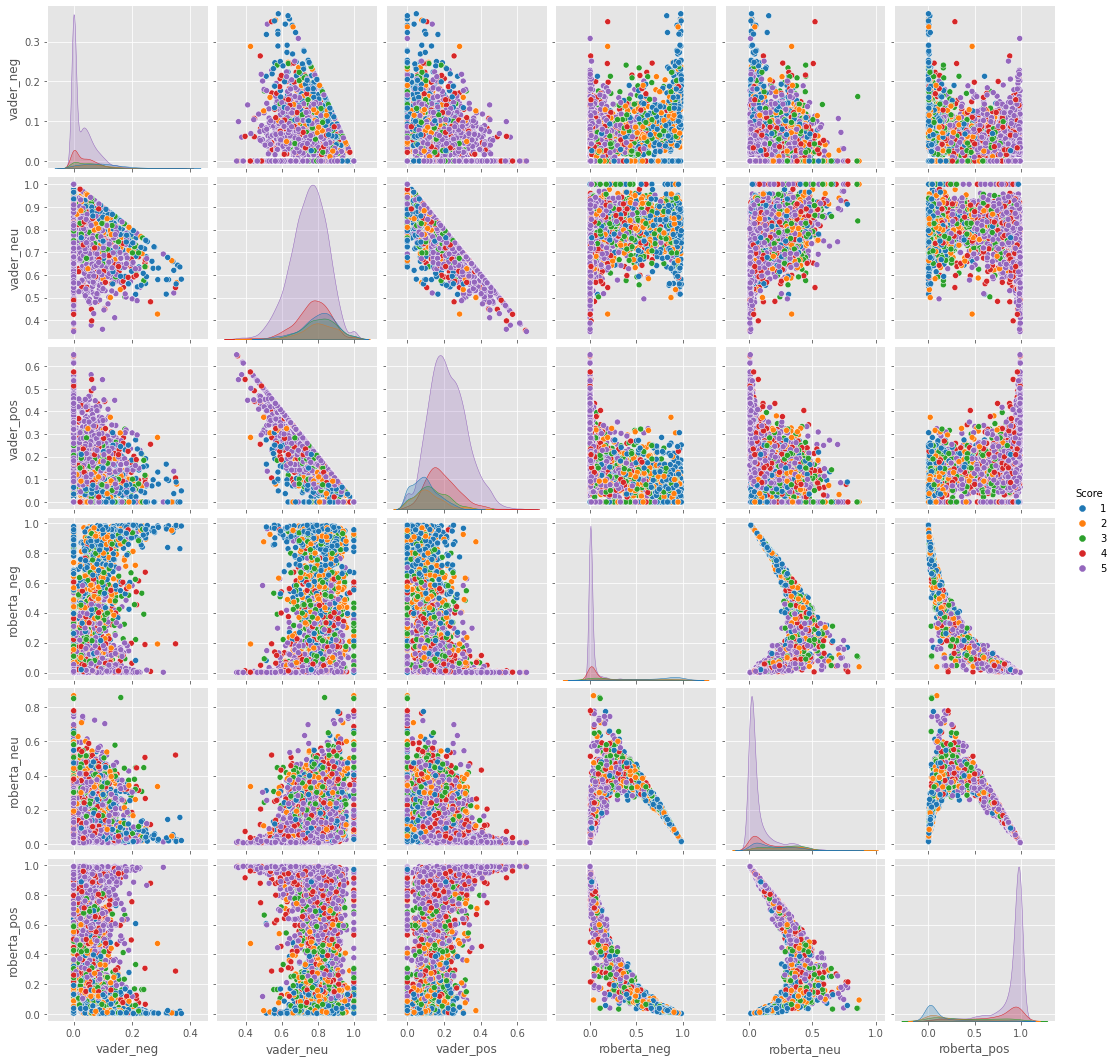

In [49]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos', 
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue='Score',
             palette='tab10')
plt.show()

### Examples where the model gave it a positive/negative score but the actual review score is the opposite.

In [54]:
results_df.query('Score == 1').sort_values('roberta_pos', ascending=False)['Text'].values[0]

'Bisquick GF is easy to use. Pancakes and muffins are very<br />tasty. The product is quick and easy to use. It makes my day.  Gram'

The statement above was reviewed with a 1-star score but the Roberta model gave it a high review. The statement is sarcastic; hence, the model was confused of this.

In [55]:
results_df.query('Score == 1').sort_values('vader_pos', ascending=False)['Text'].values[0]

"Second ingredient is SUGAR! Need I say more? Make your own bisquit mix, it's super easy!"

For the VADER model, it was also probably confused due to sarcasm.

For the opposite example, i.e., the actual score is high but the model gave it a low score...

In [56]:
results_df.query('Score == 5').sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [57]:
results_df.query('Score == 5').sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

As we can see, both models gave the same statement a negative review because some words are negative, e.g., maybe 'too fast', 'too bad', and 'my fault'

# Using the HuggingFace Transformer pipeline

In [58]:
from transformers import pipeline

We can explore the parameters of the pipeline() function but let's just simply use it.

In [60]:
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


D:\anaconda\envs\BirdCNN\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\gbert\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [80]:
sent_pipeline("this is so good hehe")

[{'label': 'POSITIVE', 'score': 0.9998760223388672}]

In [83]:
sent_pipeline("This sucks")

[{'label': 'NEGATIVE', 'score': 0.9992915391921997}]

### Performance of Each Model Using an Actual Audience Review

The review was from one of the POSITIVE reviews for Resident Evil 4 Remake. The review is...

"This game is amazing! I might reconsider giving it a 5/5 if certain things grow on me such as certain things that got cut from the game unfortunately, but I think this game is so good and improves upon aspects of the original in so many ways. 

Ashley is in my opinion a better character, Luis is in my opinion a better character with a lot more screen time, There are new areas that have been added and old areas that have been expanded upon in a lot of ways. There's a couple new weapons in the game, new challenges, side quests, parrying, much better puzzles, and possibly even better pacing. 
I personally like that they went for a darker approach whilst also keeping some of the charm of the original with the wacky one liners. If I were more accurately able to rate it, so far I'd say I'd give it a 9.5/10. 

The only problems that I have is Adas voice acting and the things that are cut from the game including incendiary grenades, the prl gun, separate ways which will most likely be added later, and a major boss fight as well as some other very very minor cuts such as some lines of dialogue that are cut and replaced with something else. If these things were in the game I'd probably easily be able to give it a 10, it just sucks they're not in. That doesn't mean you shouldn't play it though, you should. This game is a perfect first Resident Evil game for anyone who has never played any before and I think that og fans might find new things to appreciate about this remake as well. Phenomenal game overall."

In [87]:
review_text = "This game is amazing! I might reconsider giving it a 5/5 if certain things grow on me such as certain things that got cut from the game unfortunately, but I think this game is so good and improves upon aspects of the original in so many ways.Ashley is in my opinion a better character, Luis is in my opinion a better character with a lot more screen time, There are new areas that have been added and old areas that have been expanded upon in a lot of ways. There's a couple new weapons in the game, new challenges, side quests, parrying, much better puzzles, and possibly even better pacing. I personally like that they went for a darker approach whilst also keeping some of the charm of the original with the wacky one liners. If I were more accurately able to rate it, so far I'd say I'd give it a 9.5/10. The only problems that I have is Adas voice acting and the things that are cut from the game including incendiary grenades, the prl gun, separate ways which will most likely be added later, and a major boss fight as well as some other very very minor cuts such as some lines of dialogue that are cut and replaced with something else. If these things were in the game I'd probably easily be able to give it a 10, it just sucks they're not in. That doesn't mean you shouldn't play it though, you should. This game is a perfect first Resident Evil game for anyone who has never played any before and I think that og fans might find new things to appreciate about this remake as well. Phenomenal game overall."

#### HUGGINGFACE

In [88]:
sent_pipeline(review_text)

[{'label': 'POSITIVE', 'score': 0.9916187524795532}]

#### VADER

In [89]:
sia.polarity_scores(review_text)

{'neg': 0.12, 'neu': 0.694, 'pos': 0.187, 'compound': 0.971}

#### ROBERTA

In [90]:
polarity_scores_roberta(review_text)

{'roberta_neg': 0.01881147,
 'roberta_neu': 0.0835383,
 'roberta_pos': 0.89765024}

We can see that the Huggingface model was the most accurate model among the three while the VADER model made the wrong inference. The huggingface model predicted it to be positive with 99.16% confidence value while the Roberta model
also predicted it to be a positive review with 89.77% confidence value. On the other hand, however, the VADER model predicted it to be a neutral with a confidence value of 69.4%.

### Example of a Negative statement using HuggingFace Transformer

This next review is a 2-star review also for Resident Evil 4 Remake. The review is...

"It pains me not to give this game more than 2 stars as an RE fan, but man it has weird issues. Enemies absolutely swallow ammo, the knife has durability, tons of levity was removed, and Ashley had her health removed for a 2 hit kill system.

I found myself constantly getting frustrated in ways I definitely don’t remember happening in the original, even with the remnant controls from the prior games.

It’s graphically competent and I occasionally had fun, but it felt like I had to drag myself through the mud to get to actual fun. Especially with the killer Dead Space remake that just came out, this bites.

The worst part, and I said this when they announced it, is that the game really didn’t need a full remake. I wasn’t expecting major nostalgia, but this is low."

In [91]:
negative_review = "It pains me not to give this game more than 2 stars as an RE fan, but man it has weird issues. Enemies absolutely swallow ammo, the knife has durability, tons of levity was removed, and Ashley had her health removed for a 2 hit kill system. I found myself constantly getting frustrated in ways I definitely don’t remember happening in the original, even with the remnant controls from the prior games. It’s graphically competent and I occasionally had fun, but it felt like I had to drag myself through the mud to get to actual fun. Especially with the killer Dead Space remake that just came out, this bites. The worst part, and I said this when they announced it, is that the game really didn’t need a full remake. I wasn’t expecting major nostalgia, but this is low."

#### HUGGINGFACE

In [92]:
sent_pipeline(negative_review)

[{'label': 'NEGATIVE', 'score': 0.9982678890228271}]

#### VADER

In [93]:
sia.polarity_scores(negative_review)

{'neg': 0.238, 'neu': 0.636, 'pos': 0.126, 'compound': -0.9748}

#### ROBERTA

In [94]:
polarity_scores_roberta(negative_review)

{'roberta_neg': 0.798202,
 'roberta_neu': 0.16267872,
 'roberta_pos': 0.039119318}

Now, the results are also the same wherein the Huggingface model was the top performing model while the VADER model misclassified it again. However, this time, the confidence values between Huggingface and Roberta are much more larger
(99.53% vs 79.82%) meaning the huggingface is generalizes better than Roberta (at least in this specific instance). It is most likely due to the difference in their quality since Huggingface is the state-of-the-art model.